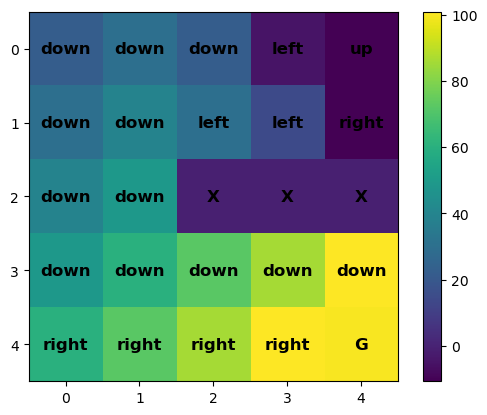

In [50]:
import matplotlib.pyplot as plt
import numpy as np

GOAL = (4,4)
START = (0,0)
TRAPS = {(2,2), (2,3), (2,4)}
STATES = {(i,j) for i in range(5) for j in range(5)}
ACTIONS = {'up': (-1,0), 'down': (1,0), 'left': (0,-1), 'right': (0,1)}

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 100000

q_values = np.zeros((5,5,4))
q_values[GOAL] = 1  # Goal state

def transition(state, action):
    next_state = (state[0] + action[0], state[1] + action[1])
    if next_state in TRAPS:
        return state
    if next_state in STATES:
        return next_state
    return state

def reward(state, action):
    next_state = transition(state, action)
    if next_state == GOAL:
        return 100
    if next_state in TRAPS:
        return -100
    return -5

def plot_policy(q_values):
    policy = np.zeros((5,5), dtype=int)
    vals = np.zeros((5,5))
    for i in range(5):
        for j in range(5):
            policy[i,j] = np.argmax(q_values[i,j])
            vals[i,j] = np.max(q_values[i,j])
            if (i,j) in TRAPS:
                vals[i,j] = -1
            elif (i,j) == GOAL:
                vals[i,j] = 100
    plt.imshow(vals)

    for i in range(5):
        for j in range(5):
            if (i,j) in TRAPS:
                plt.text(j, i, 'X', color='black', fontsize=12, fontweight='bold', horizontalalignment='center', verticalalignment='center')
            elif (i,j) == GOAL:
                plt.text(j, i, 'G', color='black', fontsize=12, fontweight='bold', horizontalalignment='center', verticalalignment='center')
            else:
                plt.text(j, i, list(ACTIONS.keys())[policy[i,j]], color='black', fontsize=12, fontweight='bold', horizontalalignment='center', verticalalignment='center')
    plt.colorbar()
    plt.show()

for _ in range(episodes):
    state = START
    while state != GOAL:
        if np.random.rand() < epsilon:
            i = np.random.choice(range(4))
        else:
            i = np.argmax(q_values[state])
        a = list(ACTIONS.keys())[i]
        action = ACTIONS[a]
        next_state = transition(state, action)
        q_values[state][i] += alpha * (reward(state, action) + gamma * np.max(q_values[next_state]) - q_values[state][i])
        state = next_state
    
plot_policy(q_values)